Exploring Dandiset 001363: Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores the Dandiset [001363](https://dandiarchive.org/dandiset/001363), which contains neural spiking data in the rat somatosensory cortex using a flexible electrode responding to transcranial focused ultrasound.

You can also explore this Dandiset using the Neurosift interface:

https://neurosift.app/dandiset/001363

## Notebook Overview

This notebook will cover the following:

1.  Loading the Dandiset using the DANDI API.
2.  Loading and visualizing the `ElectricalSeries` data from an NWB file.
3.  Examining the `trials` data and plotting the distribution of trial durations.

## Required Packages

The following packages are required to run this notebook:

*   `pynwb`
*   `h5py`
*   `remfile`
*   `matplotlib`
*   `pandas`
*   `numpy`

## Loading the Dandiset using the DANDI API

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 55 assets in the dataset
\nFirst 5 assets:
- sub-BH643/sub-BH643_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T182204_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T174647_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T195303_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T180423_ecephys.nwb


## Loading and Visualizing Data from an NWB File

In this section, we will load data from the NWB file
`sub-BH589/sub-BH589_ses-20240827T160457_ecephys.nwb`. We obtained the URL for this asset using the DANDI API.

In [2]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Let's examine some metadata from the NWB file:

In [3]:
nwb.session_description # (str) Rat Ultrasound Array Stimulation

'Rat Ultrasound Array Stimulation'

In [4]:
nwb.identifier # (str) BH589_1500_200_67_25V

'BH589_1500_200_67_25V'

In [5]:
nwb.session_start_time # (datetime) 2024-08-27T16:04:57-04:00

datetime.datetime(2024, 8, 27, 16, 4, 57, tzinfo=tzoffset(None, -14400))

Now, let's load and visualize the `ElectricalSeries` data.

In [6]:
# Access the ElectricalSeries data
electrical_series = nwb.acquisition["ElectricalSeries"]
data = electrical_series.data
rate = electrical_series.rate

# Print some basic information about the data
print(f"Data shape: {data.shape}")
print(f"Data dtype: {data.dtype}")
print(f"Sampling rate: {rate}")

Data shape: (31084544, 32)
Data dtype: float32
Sampling rate: 24414.0625


Plot a small subset of the data (first 1000 samples from the first channel)

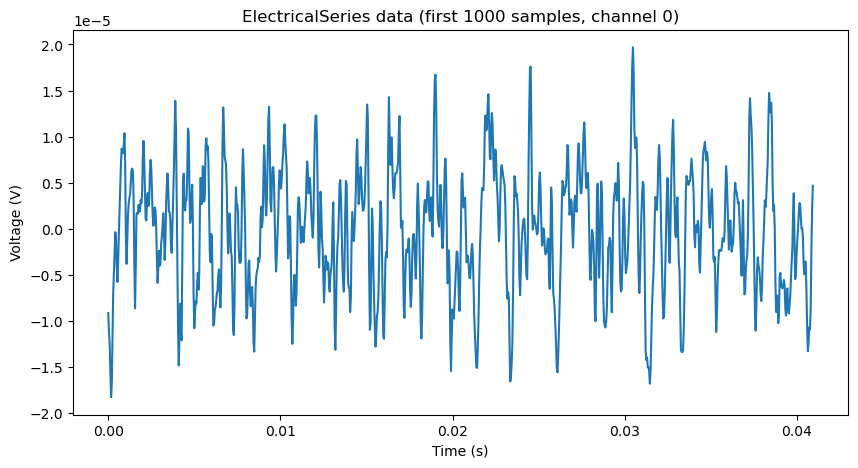

In [7]:
# Plot a small subset of the data (first 1000 samples from the first channel)
num_samples = 1000
channel_index = 0
time = np.arange(num_samples) / rate
subset_data = data[:num_samples, channel_index]

plt.figure(figsize=(10, 5))
plt.plot(time, subset_data)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title(f"ElectricalSeries data (first {num_samples} samples, channel {channel_index})")
plt.show()

## Examining the `trials` data

In this section, we will examine the `trials` data and plot the distribution of trial durations.

In [8]:
import pandas as pd

# Access the trials data
trials = nwb.intervals["trials"]
trials_df = trials.to_dataframe()

# Subtract session_start_time from start_time and stop_time
session_start_time = nwb.session_start_time.timestamp()
trials_df["start_time"] = trials_df["start_time"] - session_start_time
trials_df["stop_time"] = trials_df["stop_time"] - session_start_time

# Print the first few rows of the trials dataframe
print(trials_df.head())

      start_time     stop_time
id                            
1  -1.724789e+09 -1.724789e+09
2  -1.724789e+09 -1.724789e+09
3  -1.724789e+09 -1.724789e+09
4  -1.724789e+09 -1.724789e+09
5  -1.724789e+09 -1.724789e+09


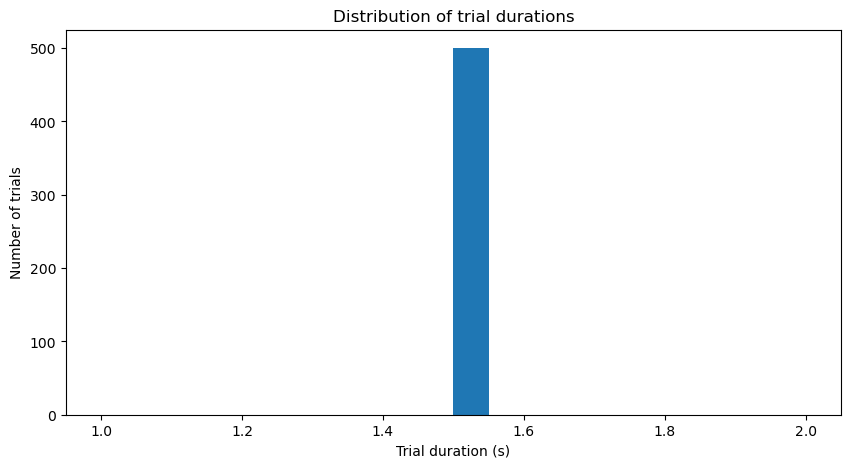

In [9]:
# Calculate the duration of each trial
trials_df["duration"] = trials_df["stop_time"] - trials_df["start_time"]

# Plot the duration of each trial as a histogram
plt.figure(figsize=(10, 5))
plt.hist(trials_df["duration"], bins=20)
plt.xlabel("Trial duration (s)")
plt.ylabel("Number of trials")
plt.title("Distribution of trial durations")
plt.show()

## Summary and Future Directions

This notebook demonstrated how to load and visualize data from Dandiset 001363 using the DANDI API and PyNWB. We explored the `ElectricalSeries` data and the `trials` data.

Possible future directions for analysis include:

*   Performing spike sorting on the `ElectricalSeries` data to identify individual neurons.
*   Analyzing the relationship between the tFUS stimulation and the neural activity.
*   Comparing the neural activity across different stimulation parameters.